Trying to build graph with dummy data with same structure as our actual data

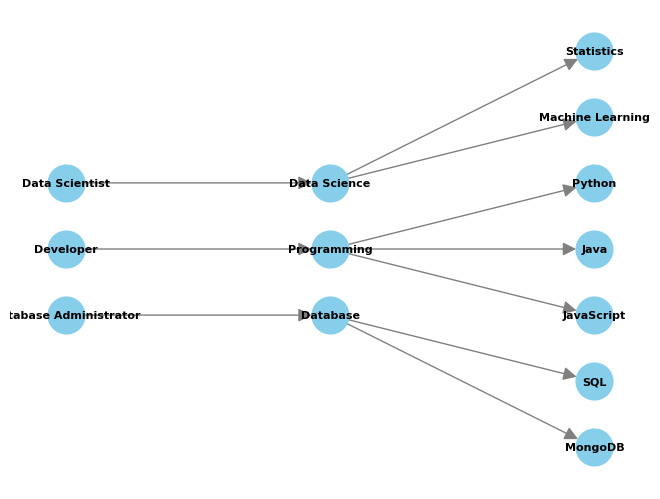

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'Role': ['Developer', 'Database Administrator', 'Data Scientist'],
    'Category': ['Programming', 'Database', 'Data Science'],
    'Skills': [['Python', 'Java', 'JavaScript'], ['SQL', 'MongoDB'], ['Machine Learning', 'Statistics']]
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes for roles
for role in data['Role']:
    G.add_node(role)

# Add edges from roles to categories
for role, category in zip(data['Role'], data['Category']):
    G.add_edge(role, category)

# Add edges from categories to skills
for category, skills in zip(data['Category'], data['Skills']):
    for skill in skills:
        G.add_edge(category, skill)

# Set positions for better visualization
pos = {
    'Developer': (0, 0),
    'Database Administrator': (0, -1),
    'Data Scientist': (0, 1),
    'Programming': (1, 0),
    'Database': (1, -1),
    'Data Science': (1, 1),
    'Python': (2, 1),
    'Java': (2, 0),
    'JavaScript': (2, -1),
    'SQL': (2, -2),
    'MongoDB': (2, -3),
    'Machine Learning': (2, 2),
    'Statistics': (2, 3),
}

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray', arrowsize=20)

# Display the plot
plt.show()


Getting our data for experiment and testing

In [ ]:
import pandas as pd

In [ ]:
skill_map = pd.read_csv('/content/ds_skillmap_data.csv')

In [ ]:
skill_map.head()

,Job Title,Category,Skills and tools
0,Data Scientist,Programming Language,"Python, R"
1,Data Scientist,Subject Knowledge,"CICD, NLP, Deep Learning, DevOps, ETL, ML algo..."
2,Data Scientist,ML Framework,OpenCV
3,Data Scientist,Database Software,"NoSQL, SQL, Data warehouse, MongoDB"
4,Data Scientist,Cloud Software,"Azure, Hadoop,GCP"


Dropping empty rows

In [ ]:
skill_map = skill_map.dropna()

In [ ]:
print(list(skill_map['Job Title']))

['Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Data Analyst ', 'Data Analyst ', 'Data Analyst ', 'Data Analyst ', 'Data Analyst ', 'Data Analyst ', 'Business Analyst ', 'Business Analyst ', 'Business Analyst ', 'Business Analyst ', 'Business Analyst ', 'Business Analyst ', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Software Engineer', 'Software Engineer', 'Software Engineer', 'Software Engineer', 'Software Engineer', 'Software Engineer', 'Software Engineer', 'Software Engineer', 'Cybersecurity Analyst', 'Cybersecurity Analyst', 'Cybersecurity Analyst', 'Cyb

Making a graph for the entire dataset

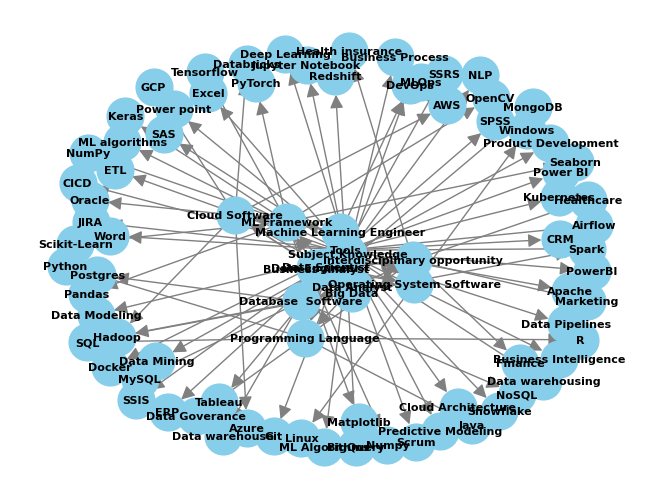

In [ ]:
import networkx as nx
G = nx.DiGraph()
  # Add nodes for job titles, categories, and skills/tools
for row in skill_map.itertuples(index=False):
      job_title = row[0]
      category = row[1]
      skills_tools = [skill.strip() for skill in row[2].split(',')]

      G.add_node(job_title)
      G.add_edge(job_title, category)

      for skill_tool in skills_tools:
          G.add_edge(category, skill_tool)

  # Set positions for better visualization
pos = nx.fruchterman_reingold_layout(G)

  # Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray', arrowsize=20)

  # Display the plot
nx.write_gexf(G,'ds_domain.gexf')


Splitting dataset based on each job role

In [ ]:
roles = ['Data Scientist', 'Data Analyst ', 'Business Analyst ', 'Machine Learning Engineer', 'Data Engineer', 'Software Engineer', 'Cybersecurity Analyst', 'Network Engineer', 'QA Engineer']

In [ ]:
for name in roles:
  new_df = skill_map[skill_map['Job Title']==name]
  print(new_df)
  new_df.to_csv(f'{name}.csv')

        Job Title                       Category  \
0  Data Scientist           Programming Language   
1  Data Scientist              Subject Knowledge   
2  Data Scientist                   ML Framework   
3  Data Scientist             Database  Software   
4  Data Scientist                 Cloud Software   
5  Data Scientist                          Tools   
6  Data Scientist      Operating System Software   
7  Data Scientist  Interdisciplinary opportunity   

                                    Skills and tools  
0                                          Python, R  
1  CICD, NLP, Deep Learning, DevOps, ETL, ML algo...  
2                                             OpenCV  
3                NoSQL, SQL, Data warehouse, MongoDB  
4                                  Azure, Hadoop,GCP  
5  SPSS, SAS, Tableau,  Power BI, Excel , Power p...  
6                                              Linux  
7                                         Healthcare  
        Job Title                   

In [ ]:
ds_roles = pd.read_csv('/content/Data Scientist.csv')
da_roles = pd.read_csv('/content/Data Analyst .csv')
ba_roles = pd.read_csv('/content/Business Analyst .csv')
mle_roles = pd.read_csv('/content/Machine Learning Engineer.csv')
de_roles = pd.read_csv('/content/Data Engineer.csv')
swe_roles = pd.read_csv('/content/Software Engineer.csv')
csa_roles = pd.read_csv('/content/Cybersecurity Analyst.csv')
ne_roles = pd.read_csv('/content/Network Engineer.csv')
qa_roles = pd.read_csv('/content/QA Engineer.csv')

Creating graph for each role + getting the .gexf file

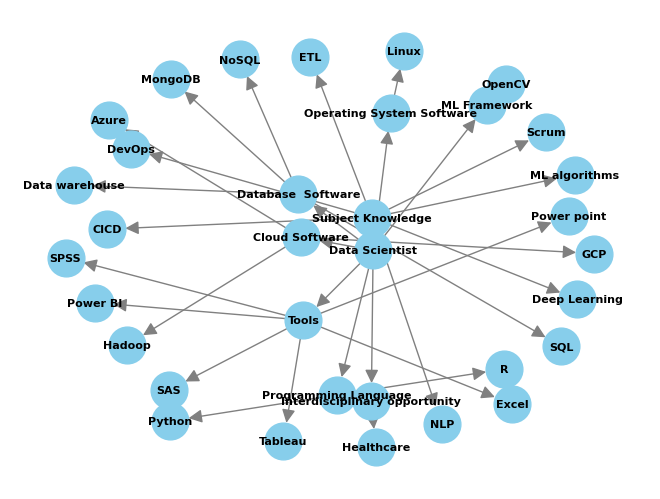

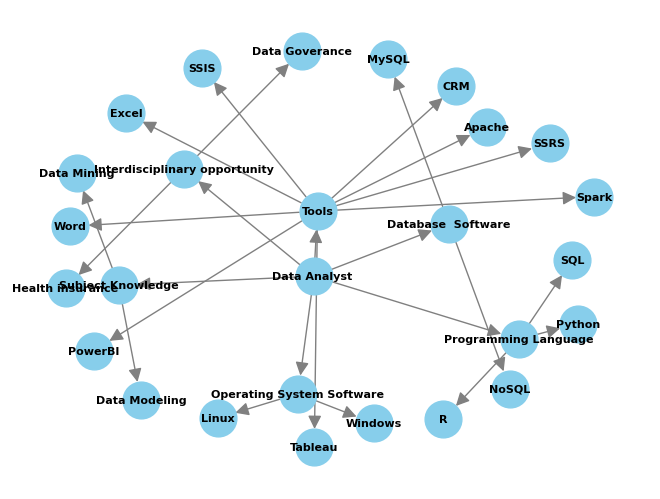

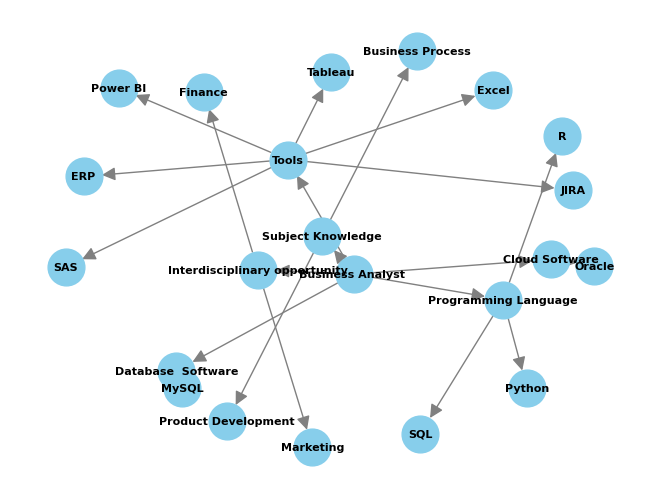

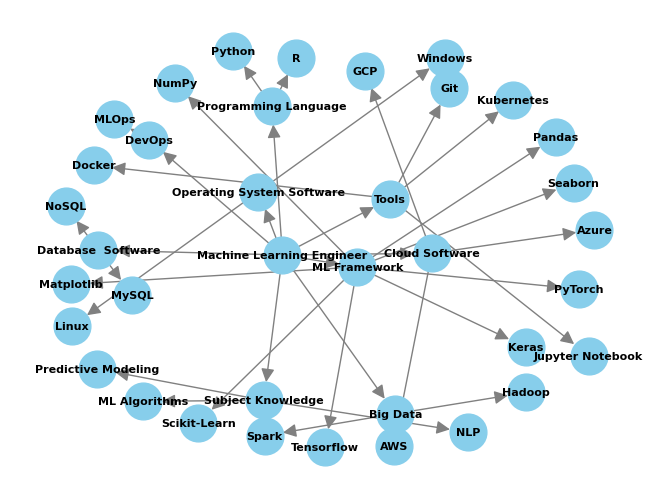

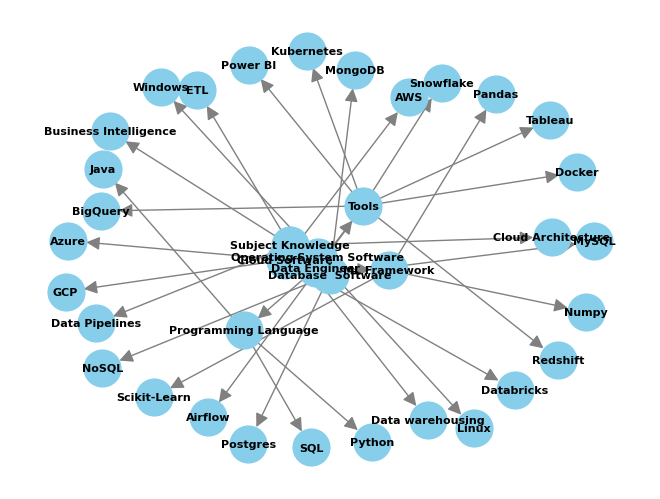

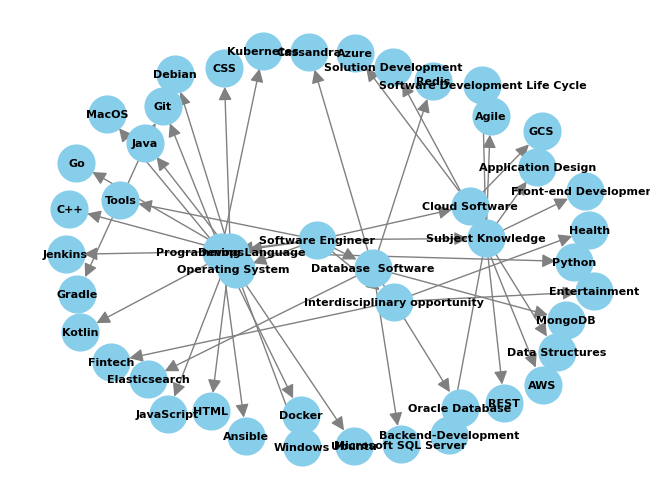

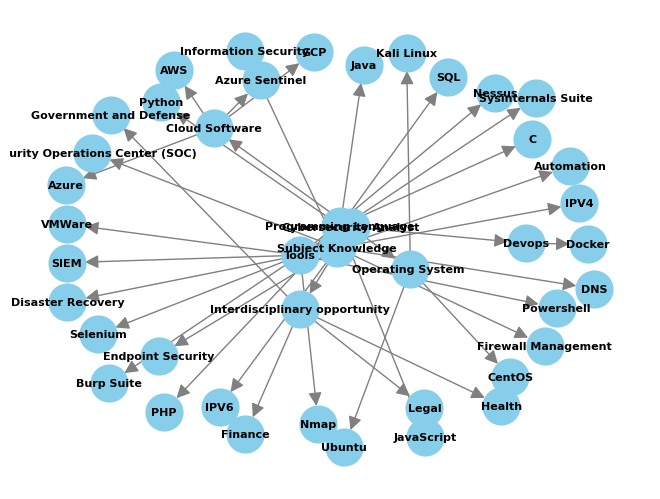

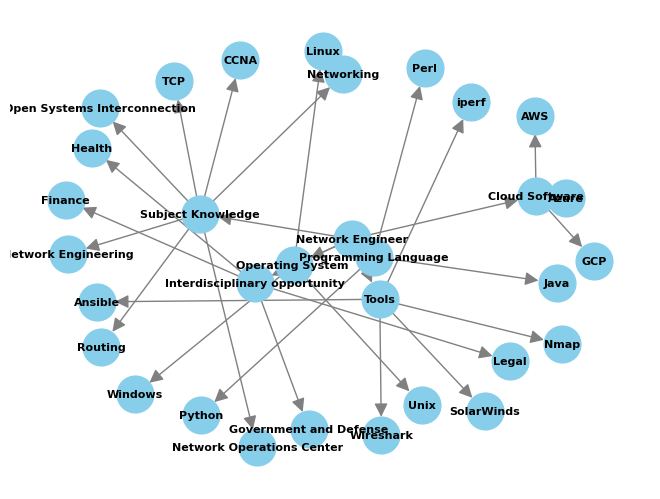

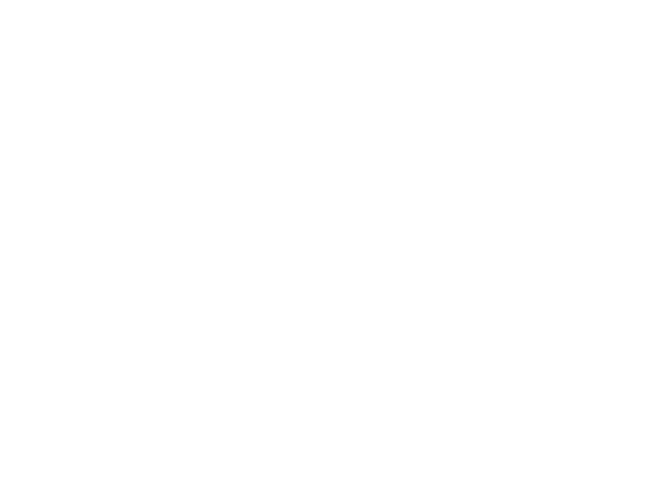

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt
for role in roles:
  df = pd.read_csv(f'/content/{role}.csv')
  new_df = df.drop('Unnamed: 0', axis=1)
  G = nx.DiGraph()
  # Add nodes for job titles, categories, and skills/tools
  for row in new_df.itertuples(index=False):
      job_title = row[0]
      category = row[1]
      skills_tools = [skill.strip() for skill in row[2].split(',')]

      G.add_node(job_title)
      G.add_edge(job_title, category)

      for skill_tool in skills_tools:
          G.add_edge(category, skill_tool)

  # Set positions for better visualization
  pos = nx.fruchterman_reingold_layout(G)

  # Draw the graph
  nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray', arrowsize=20)

  # Display the plot
  plt.show()
  nx.write_gexf(G, f'{role}_graph.gexf')
